# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [3]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
#clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/partha/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


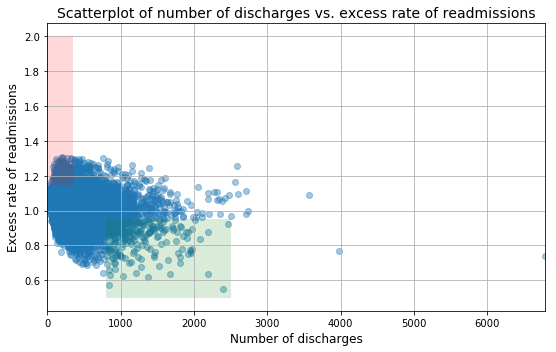

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.4)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

In [6]:
# only keep the rows where the excess readmission ratio values are not NaN

df = clean_hospital_read_df#.drop('Footnote', axis=1)
df = df[df['Excess Readmission Ratio'].notnull()]

In [7]:
# small hospitals 

small = df[df['Number of Discharges'] < 100]
print 'mean excess readmission ratio for small hospitals:', small['Excess Readmission Ratio'].mean()
print 'percentage of small hospitals with excess readmission ratio larger than 1:', 100. * len(small[small['Excess Readmission Ratio'] > 1.]) / float(len(small))

mean excess readmission ratio for small hospitals: 1.02261835017
percentage of small hospitals with excess readmission ratio larger than 1: 63.2154882155


In [8]:
# large hospitals 

large = df[df['Number of Discharges'] > 1000]
print 'mean excess readmission ratio for large hospitals:', large['Excess Readmission Ratio'].mean()
print 'percentage of large hospitals with excess readmission ratio larger than 1:', 100. * len(large[large['Excess Readmission Ratio'] > 1.]) / float(len(large))

mean excess readmission ratio for large hospitals: 0.978335421166
percentage of large hospitals with excess readmission ratio larger than 1: 44.4924406048


<div class="alert alert-info">

<h3>The statistics presented are correct: </h3>

<p><li>In the hospitals with number of discharges less than 100, the mean excess readmission ratio is 1.023 and the percentage of hospitals with excess readmission ratio > 1 is 63%. 

<li>In the hospitals with number of discharges greater than 1000, the mean excess readmission ratio is 0.978 and the percentage of hospitals with excess readmission ratio > 1 is 44%. </p>

</div>

In [9]:
# remove the outliers 

newdf = df[(df['Number of Discharges'] < 3000) & (df['Excess Readmission Ratio'] < 1.6) & (df['Excess Readmission Ratio'] > 0.6)]

output = st.pearsonr(newdf['Number of Discharges'], newdf['Excess Readmission Ratio'])
print 'correlation coefficient between the number of discharges and the excess readmission ratio is:', output[0]
print 'p-value for the correlation coefficient:', output[1]

output = st.linregress(newdf['Number of Discharges'], newdf['Excess Readmission Ratio'])
print 'slope of the linear regression line is:', output[0]
print 'p-value for the slope of the linear regression line:', output[3]

correlation coefficient between the number of discharges and the excess readmission ratio is: -0.0898899153794
p-value for the correlation coefficient: 4.73086361357e-22
slope of the linear regression line is: -2.73877397734e-05
p-value for the slope of the linear regression line: 4.7308636136e-22


<div class="alert alert-info">

<h3> Correlation: </h3>

<p>There is a correlation of $-0.09$ between the number of discharges and the excess readmission ratio. The correlation is statistically significant at $\alpha = 0.01$. </p>

</div>

In [10]:
# we test for the statistical significance of the slopes of the linear regression lines for three cases:

# all the hospitals 
newdf = df[(df['Number of Discharges'] < 3000) & (df['Excess Readmission Ratio'] < 1.6) & (df['Excess Readmission Ratio'] > 0.6)]
output = st.linregress(newdf['Number of Discharges'], newdf['Excess Readmission Ratio'])
print 'slope of the regression line for all the hospitals:', output[0]
print 'p-value for the slope:', output[3], '\n'

# hospitals with small discharge numbers
newdf_small = df[(df['Number of Discharges'] < 200) & (df['Excess Readmission Ratio'] < 1.6) & (df['Excess Readmission Ratio'] > 0.6)]
output_small = st.linregress(newdf_small['Number of Discharges'], newdf_small['Excess Readmission Ratio'])
print 'slope of the regression line for hospitals with small discharge numbers:', output_small[0]
print 'p-value for the slope:', output_small[3], '\n'

# hospitals with large discharge numbers
newdf_large = df[(df['Number of Discharges'] > 1000) & (df['Excess Readmission Ratio'] < 1.6) & (df['Excess Readmission Ratio'] > 0.6)]
output_large = st.linregress(newdf_large['Number of Discharges'], newdf_large['Excess Readmission Ratio'])
print 'slope of the regression line for hospitals with large discharge numbers:', output_large[0]
print 'p-value for the slope:', output_large[3], '\n'

newdf_medium = df[(df['Number of Discharges'] > 200) & (df['Number of Discharges'] < 1000) & (df['Excess Readmission Ratio'] < 1.6) & (df['Excess Readmission Ratio'] > 0.6)]

slope of the regression line for all the hospitals: -2.73877397734e-05
p-value for the slope: 4.7308636136e-22 

slope of the regression line for hospitals with small discharge numbers: -0.000117417529943
p-value for the slope: 4.7013419734e-05 

slope of the regression line for hospitals with large discharge numbers: -1.64392166491e-05
p-value for the slope: 0.17339261404 



<div class='alert alert-info'>
<p><li>The slopes of the regression lines are nonzero with high statistical significance in the first two cases: <strong>all the hospitals</strong> and <strong>hospitals with small discharge numbers</strong>. </p>
<p><li>The slope of the regression line for <strong>hospitals with large discharge numbers</strong> has a large p-value, so is not different from zero with high statistical significance. Using <strong>slope zero</strong> in that case. </p>
</div>

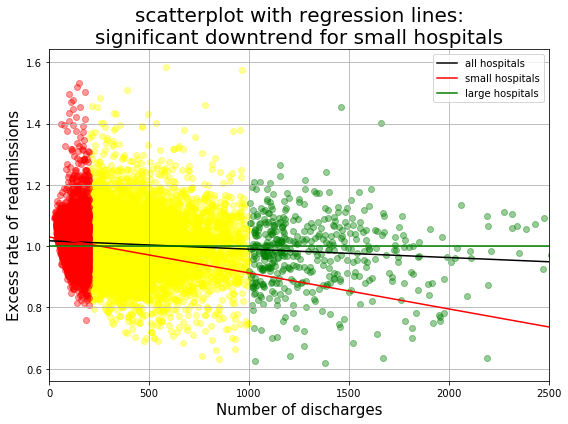

In [11]:
# a better plot that illustrates the above analysis - outliers removed and regression line added 

# scatterplot
x = list(newdf_medium['Number of Discharges'].values)
y = list(newdf_medium['Excess Readmission Ratio'].values)
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x, y,alpha=0.4, color='yellow')

x = list(newdf_small['Number of Discharges'].values)
y = list(newdf_small['Excess Readmission Ratio'].values)
ax.scatter(x, y,alpha=0.4, color='red')

x = list(newdf_large['Number of Discharges'].values)
y = list(newdf_large['Excess Readmission Ratio'].values)
ax.scatter(x, y,alpha=0.4, color='green')

# regression line for all the hospitals
x = np.linspace(0,2500,101)
y = x * output[0] + output[1]
ax.plot(x,y, color='black', label='all hospitals')

# regression line for the hospitals with small number of discharges 
y = x * output_small[0] + output_small[1]
ax.plot(x,y, color='red', label='small hospitals')

# regression line for the hospitals with large number of discharges 
y = x * 0 + output_large[1]
ax.plot(x,y, color='green', label='large hospitals')

#ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
#ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.legend()
ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=15)
ax.set_ylabel('Excess rate of readmissions', fontsize=15)
ax.set_title('scatterplot with regression lines:\nsignificant downtrend for small hospitals', fontsize=20)

ax.grid(True)
fig.tight_layout()

<div class='alert alert-info'>
<h3>This plot illustrates the findings in the report regarding the downtrend.</h3>
<p><li><strong>red line:</strong> regression line for the <strong>red dots (hospitals with smaller discharge numbers)</strong>.</p> 
<p><li><strong>green line:</strong> regression line for the <strong>green dots (hospitals with large discharge numbers)</strong>.</p> 
<p><li><strong>black line:</strong> regression line for <strong>all the dots (all the hospitals)</strong>.</p> 
<p><li><strong>yellow dots:</strong> hospitals with <strong>mid-range discharge numbers</strong>.</p> 
</div>

<div class='alert alert-info'>
<h3> Concluding Remarks: </h3>
<p> The above plot with the regression lines suggests that there is indeed a downtrend in excess readmission rate with the number of discharges. This downtrend is much more pronounced in the hospitals with smaller discharge numbers compared to the hospitals with larger discharge numbers. This suggests that perhaps smaller hospitals are inadequately equipped to prevent the complications that lead to readmission. </p>
</div>